# Symbolinen laskenta sympy-kirjastoa käyttäen

Tässä muistikirjassa käydään läpi Pythonin symbolisen laskennan sympy-kirjaston perusulottuvuuksia.

In [1]:
import sympy

In [2]:
z**2

NameError: name 'z' is not defined

In [3]:
sympy.var('z') # esitellään muuttuja ensin

z

In [4]:
z**2 # nyt sillä voidaan laskea

z**2

In [5]:
True^True # ^ on varattu Pythonissa XOR-operaatiolle

False

In [6]:
True^False

True

In [7]:
z**(1/2) 

z**0.5

Yllä Python laskee suluissa olevan jakolaskun ensin
ja siitä tulee Python-objekti ennen kuin SymPy ehtii muuttaa sen SymPyn olioksi.

Ratkaisu on käyttää sympify() tai Rational-luokkaa.

In [8]:
z**(sympy.sympify(1)/2)

sqrt(z)

In [9]:
z**sympy.Rational(1/2)

sqrt(z)

Esitellään muuttujia:

In [10]:
from sympy import symbols
x, y, z = symbols('x y z')
u, v, w = symbols('u v w')
symbols('j0:7')

(j0, j1, j2, j3, j4, j5, j6)

In [11]:
g, h = symbols('h g')

In [12]:
g

h

In [13]:
h

g

Variables Assignment does not Create a Relation Between Expressions

In [14]:
from sympy import Symbol
a=Symbol('a') # muuttujan a arvo a

In [15]:
b=a+1 # muuttujan b arvo lauseke a+1

In [16]:
print(b)

a + 1


In [17]:
a=4 # nyt a osoittaa kokonaislukuun 4, ei symboliin a

In [18]:
print(a)

4


In [19]:
print(b) # b osoittaa lausekkeeseen, jonka arvo a+1

a + 1


In [24]:
from sympy.abc import p

In [25]:
sympy.sqrt(p**2) # SymPy ei yksinkertaista tätä, koska vastauksena voi olla 1- tai 1

sqrt(p**2)

In [26]:
p=Symbol('p', positive=True) # nyt ratkaisu on yksikäsitteinen

In [27]:
sympy.sqrt(p**2)

p

Yhtäsuuruuden testausta, Eq, ==

In [28]:
from sympy import symbols
x, y = symbols('x y')
sympy.Eq(x,y) # symbolinen yhtäsuuruus ilmaistaan Eq:lla

Eq(x, y)

In [29]:
(x-1)**2 == x**2-2*x+1 # == testaa symbolista samankaltaisuutta

False

In [30]:
(x-1)**2 == (x-1)**2 # == testaa symbolista samankaltaisuutta

True

Semanttisen samankaltaisuuden testaamiseen vähennä lausekkeet toisistaan ja käytä expand, simplify. Muista myös trigsimp, powsimp, trigsimp, logcombine, radsimp, together

In [31]:
from sympy import simplify
simplify((x-1)**2-(x**2-2*x+1))

0

In [32]:
from sympy import sin, cos, simplify, expand, powsimp, trigsimp, logcombine, radsimp, together
sinilauseke1 = sin(2*x)-2*sin(x)*cos(x)


In [33]:
simplify(sinilauseke1)

0

In [34]:
expand(sinilauseke1, trig=True)

0

In [35]:
from sympy.abc import a,b
expand((a-b)**4) # lasketaan (a-b)^4

a**4 - 4*a**3*b + 6*a**2*b**2 - 4*a*b**3 + b**4

In [36]:
expand(2*x+3*y, complex=True) # otetaan kompleksiluvut käyttöön

2*re(x) + 3*re(y) + 2*I*im(x) + 3*I*im(y)

In [37]:
expand(cos(x+y)**2, trig=True) # otetaan trigonometriset funktiot käyttöön

sin(x)**2*sin(y)**2 - 2*sin(x)*sin(y)*cos(x)*cos(y) + cos(x)**2*cos(y)**2

In [38]:
expand(cos(x+2*y), trig=True)  # otetaan trigonometriset funktiot käyttöön

-2*sin(x)*sin(y)*cos(y) + 2*cos(x)*cos(y)**2 - cos(x)

In [40]:
simplify((x**3+y**2*x)/x) # lausekkeen sieventämistä

x**2 + y**2

In [48]:
from sympy import I
expand((4+3*I)**(4+3*I)) #lausekkeen sieventämistä

336*I*(4 + 3*I)**(3*I) - 527*(4 + 3*I)**(3*I)

Harjoittele: laske (x-y)^4 ja sievennä sin(x)/cos(x)

In [49]:
powsimp(x**a*x**b) #lasketaan potensseja

x**(a + b)

In [51]:
import pprint #pretty printing
pprint((3-x**(2*x)/(x+1)))

TypeError: 'module' object is not callable

In [52]:
together(x**6-17*x**4+8*x**2+5+3*x**5+22*x**3-8*x+6)

x**6 + 3*x**5 - 17*x**4 + 22*x**3 + 8*x**2 - 8*x + 11

In [53]:
together(1/a+1/b)

(a + b)/(a*b)

Kuviot

In [54]:
import matplotlib.pyplot
%matplotlib inline

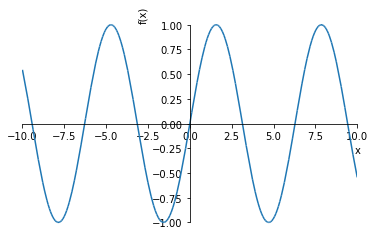

In [55]:
sympy.plot(sympy.sin(x))

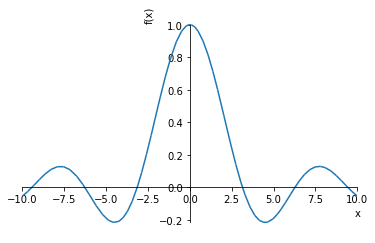

In [56]:
sympy.plot(sympy.sin(x)/x)

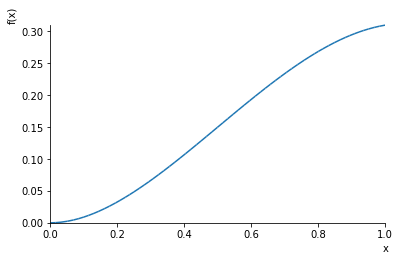

In [57]:
sympy.plot(sympy.exp(-x)*sympy.sin(x**2), (x, 0, 1)) #tässä rajoitettiin aluetta

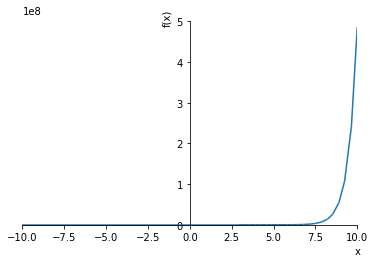

In [58]:
sympy.plot(sympy.exp(2*x))

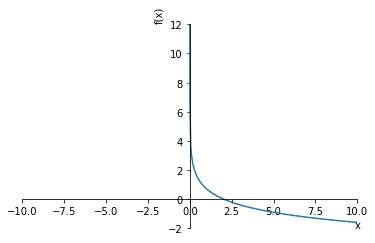

In [59]:
sympy.plot(sympy.log(2/x))

Derivointi, differentiaalit ja integrointi

In [64]:
from sympy import diff, exp
diff(cos(2*x),x)

-2*sin(2*x)

In [66]:
k = symbols('k', integer=True)
diff(exp(k*x),x)

k*exp(k*x)

In [69]:
from sympy import log
diff(log(1/x),x)

-1/x

Korkeammat derivaatat

In [70]:
diff(cos(2*x),x,3)

8*sin(2*x)

In [72]:
diff(exp(k*x),x,2)

k**2*exp(k*x)

In [74]:
from sympy import erf
diff(erf(x),x)

2*exp(-x**2)/sqrt(pi)

Hyvä tapa on myös määritellä lausekkeita ja derivoida niitä:

In [75]:
expr = x**2*sympy.sin(sympy.log(x))

In [76]:
sympy.diff(expr,x)

2*x*sin(log(x)) + x*cos(log(x))

Osittaiderivointi:

In [77]:
expr2 = x*sympy.cos(y**2 + x)

In [78]:
sympy.diff(expr2, x, 2, y, 3)

4*y*(-2*x*y**2*sin(x + y**2) + 3*x*cos(x + y**2) + 4*y**2*cos(x + y**2) + 6*sin(x + y**2))

Määräämätön derivaatta:

In [79]:
sympy.Derivative(expr2, x, 2, y, 3)

Derivative(x*cos(x + y**2), (x, 2), (y, 3))

In [80]:
sympy.Derivative(expr2, x, 2, y, 3).doit()

4*y*(-2*x*y**2*sin(x + y**2) + 3*x*cos(x + y**2) + 4*y**2*cos(x + y**2) + 6*sin(x + y**2))

Integrointi:

In [82]:
from sympy import integrate
integrate(5*x**5,x)

5*x**6/6

In [83]:
integrate(3*exp(3*x),x)

exp(3*x)

In [84]:
integrate(cos(x),x)

sin(x)

In [85]:
integrate(log(x),x)

x*log(x) - x

In [86]:
integrate(exp(-x**2)*erf(x), x)

sqrt(pi)*erf(x)**2/4

In [88]:
sympy.integrate(sympy.exp(-(x+y))*sympy.cos(x)*sympy.sin(y), x, y)

-exp(-x)*exp(-y)*sin(x)*sin(y)/4 - exp(-x)*exp(-y)*sin(x)*cos(y)/4 + exp(-x)*exp(-y)*sin(y)*cos(x)/4 + exp(-x)*exp(-y)*cos(x)*cos(y)/4

Määritetään lauseke ja operoidaan sillä:

In [87]:
integrand=sympy.log(x)**2

In [90]:
sympy.integrate(integrand, x)

x*log(x)**2 - 2*x*log(x) + 2*x

Sarjat:

In [92]:
from sympy import series
series(cos(x), x)

1 - x**2/2 + x**4/24 + O(x**6)

In [93]:
series(erf(x),x)

2*x/sqrt(pi) - 2*x**3/(3*sqrt(pi)) + x**5/(5*sqrt(pi)) + O(x**6)

In [94]:
series(exp(x),x)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [95]:
series(1/cos(x), x)

1 + x**2/2 + 5*x**4/24 + O(x**6)

Sympy laskimena

In [120]:
v, w, u = sympy.symbols('v, w, u')
n = sympy.symbols('n', interger=True)
from sympy import Mul, Pow, Rational, pi, N, oo

In [100]:
Mul(3, Rational(2,4))

3/2

In [101]:
Mul(3, Rational(2,4), evaluate=False)

3/2

In [102]:
Pow(x*y,2)

x**2*y**2

In [103]:
Pow(x*y,2, evaluate=False)

(x*y)**2

In [106]:
pi*2

2*pi

In [108]:
exp(1)

E

In [109]:
pi.evalf()

3.14159265358979

In [113]:
pi.evalf(5)

3.1416

In [117]:
N(pi)

3.14159265358979

In [118]:
N(pi, 5)

3.1416

In [112]:
print(exp(1))

E


In [122]:
oo>999999999

True

In [123]:
oo/2

oo

Laske 
- luvun kaksi neliöjuuri 50 desimaalilla,
- mikä on piin 26. desimaali,
- paljonko on luvun pi + e likiarvo.


Raja-arvot

In [128]:
from sympy import limit, sin, exp, oo
limit(sin(x)/x,x,0)

1

In [129]:
limit(exp(x)/x, x, oo)

oo

In [130]:
limit((1+1/x)**x,x,oo)

E

Määrätty intergraali:

In [131]:
integrand=sympy.log(x)**2

In [133]:
sympy.integrate(integrand, (x, 1, 10))

-20*log(10) + 18 + 10*log(10)**2

In [134]:
sympy.integrate(sympy.exp(-x), (x, 0, sympy.oo))

1

Moninkertainen integraali:

In [141]:
integrate(exp(-x**2-y**2),(x,-oo,oo),(y,-oo,oo))

pi

In [ ]:
Voidaan myös luoda määräämätön Integral-objekti. Sen arvo voidaan laskea myöhemmin.

In [138]:
sympy.Integral(integrand, (x, 1, 10))

Integral(log(x)**2, (x, 1, 10))

In [142]:
sympy.Integral(integrand, (x, 1, 10)).doit()

-20*log(10) + 18 + 10*log(10)**2

Yhtälönratkaisu

In [143]:
a, b, c, x = sympy.symbols(('a', 'b', 'c', 'x'))

In [144]:
quadr_eq = sympy.Eq(a*x**2+b*x+c, 0)

In [145]:
sympy.solve(quadr_eq)

[{a: -(b*x + c)/x**2}]

In [146]:
sympy.solve(quadr_eq, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

Opetus: Jos ei muuta määritetä, sympy ratkaisee ensimmäisen symbolin suhteen.

In [148]:
from sympy import solve
solve(x**4 - 1, x)

[-1, 1, -I, I]

In [150]:
solve(x**2+2*x-1,x)

[-1 + sqrt(2), -sqrt(2) - 1]

Yllä olevat vastaukset hakasuluissa [] ovat listoja. Listat voivat sisältää erilaisia objekteja ja niitä voi muuttaa.

In [153]:
from sympy import roots
roots(x**2+2*x-1,x)

{-sqrt(2) - 1: 1, -1 + sqrt(2): 1}

In [156]:
solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

{x: -3, y: 1}

Edellä olevat vastaukset taas ovat sanakirjoja. Ne ovat järjestämättömiä listoja ilman toistoja.

Huom. solve -> list, roots -> dictionary.

In [157]:
solve(exp(x) + 1, x) #Eulerin lause, Eulerin identiteetti

[I*pi]

Ratkaise yhtälö
(x-1)^4=4^4

Jatketaan yhtälön quadr_eq ratkaisemista:

In [164]:
ratkaisut=sympy.solve(quadr_eq, x)

In [165]:
xplus=ratkaisut[0]
xminus=ratkaisut[1]

In [166]:
xplus_arvot=xplus.subs([(a,1),(b,2),(c,3)])

In [167]:
xplus_arvot

-1 + sqrt(2)*I

In [ ]:
Voidaan sijoittaa myös muita muuttujia:

In [170]:
sympy.var('z0')
xminus_arvot=xminus.subs([(b,a), (c,a+z0)])

In [171]:
xminus_arvot

-(a + sqrt(a**2 - 4*a*(a + z0)))/(2*a)

In [172]:
xminus_arvot.simplify()

-(a + sqrt(-a*(3*a + 4*z0)))/(2*a)

Solveset on suositeltavin yhtälöiden ratkaisuun. Solveset kertoo kunkin ratkaisun vain kerran, moninkertaisuuden selvittämiseksi on hyvä käyttää funktiota roots:

In [175]:
from sympy import solveset, roots
solveset(x**3-6*x**2+9*x,x)

{0, 3}

In [176]:
roots(x**3-6*x**2+9*x,x)

{0: 1, 3: 2}

Huomaa vielä ero kahden seuraavan outputin kanssa.

In [178]:
solveset(exp(x), x) # Yhtälöllä e^x = 0 ei ole ratkaisuja.

EmptySet()

In [183]:
solveset(cos(x)-x,x) # Tälle yhtälölle sympy ei löydä ratkaisua.

ConditionSet(x, Eq(-x + cos(x), 0), Complexes(Reals x Reals, False))

Määritellään vielä funktioita:

In [181]:
from sympy import Function
f, g = symbols('f g', cls=Function)

In [182]:
f(x)

f(x)

In [185]:
f(x).diff(x)

Derivative(f(x), x)

Tekijöihin jakoa:

In [186]:
poly = x**4 - 3*x**2 + 1

In [188]:
from sympy import factor
factor(poly)

(x**2 - x - 1)*(x**2 + x - 1)

In [189]:
factor(poly,modulus=5)

(x - 2)**2*(x + 2)**2

Boolean lausekkeita

In [191]:
from sympy import satisfiable
satisfiable(x & y)

{x: True, y: True}